# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [1]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size. 


In [2]:
def Huffman_code(probability_dict):
    """
    Create the Huffman code for given probabilities  
    
    Arguments:
    ----------
    probability_dict:
      - keys: symbol as character or string
      - values: probability of the symbol as a float or double
      Example: {"A": 0.25, "B":0.5,"C":0.125,"D":0.125}
    
    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword 
      - keys: symbol as character or string
      - values: associated codeword as a character or a string    
      Example: {"A": "10", "B":"0","C":"111","D":"110"}
    
    """  
    nodes = []
    for symbol in probability_dict.keys():
      nodes.append(Node(probability_dict[symbol], symbol))
    
    while len(nodes) > 1:
      nodes = sorted(nodes, key=lambda node: node.proba)
      
      left = nodes[0]
      left.code = 0
      right = nodes[1] 
      right.code = 1

      merged_node = Node(left.proba+right.proba, '', left, right)
      nodes.append(merged_node)
      nodes.remove(left)
      nodes.remove(right)
      
    return Huffman_tree(dict(), nodes[0])


In [3]:
class Node:
    def __init__(self, proba, symbol, left=None, right=None):
        self.proba = proba
        self.symbol = symbol
        self.left = left
        self.right = right
        self.code = ''

In [4]:
def Huffman_tree(codes, node, value=''):
    """
    Assigns '0' or '1' to each branch of the Huffman_tree
    and assigns0 symbol to leaves of the tree.
     
    Arguments:
    ----------
    codes: 'empty at the beginning'
      - keys: symbol as character or string
      - values: associated codeword as a character or a string    
      Example: {"A": "10", "B":"0","C":"111","D":"110"}
    nodes: current node of the tree
    value: code of the path leading to the current node
    
    Return:
    -------
    - codes: dictionary with the name and the corresponding codeword 
      - keys: symbol as character or string
      - values: associated codeword as a character or a string    
      Example: {"A": "10", "B":"0","C":"111","D":"110"}
    
    """
    new_val = value + str(node.code)
    if node.left:
        Huffman_tree(codes, node.left, new_val)
    if node.right:
        Huffman_tree(codes, node.right, new_val)
    if (not node.left) and (not node.right):
        codes[node.symbol] = new_val
    return codes

In [7]:
ex7_dict = dict({'A':0.05, 'B':0.10, 'C':0.15, 'D':0.15, 'E':0.20, 'F':0.35})
print("Huffman code of TP2 Exercise 7 is :")
print(Huffman_code(ex7_dict))

Huffman code of TP2 Exercise 7 is :
{'A': '000', 'B': '001', 'E': '01', 'C': '100', 'D': '101', 'F': '11'}


### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course. 

In [5]:

def LZ_online(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols  
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    
    Return:
    -------
    - dictionary : the computed dictionnary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized adress with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - U : the encoded sequence in the string format
    """
    dictionary = dict({'':(0,'')})
    U = ''
    current_s = ''
    ind = 0
    for s in sequence:
        current_s = current_s + s
        if not current_s in dictionary:
            ind += 1
            if ind == 1:
                U = U + current_s
                dictionary[current_s] = (ind, current_s)
            else:
                prefix = current_s[:-1]
                address = dictionary[prefix][0] 
                dict_size = int(np.ceil(np.log2(ind)))
                coded_word = np.binary_repr(address, width=dict_size) + current_s[-1]
                dictionary[current_s] = (ind, coded_word)
                U += coded_word
            current_s = ''
    return dictionary, U

In [6]:
dictio, U = LZ_online('1011010100010')
print("Source sequence : '1011010100010'", )
print("---------------------------------DICTIONARY---------------------------------")
for key in dictio.keys():
    print("Symbol (key): " + f"{key:<10} " + "Value -> Entry index: " + f"{str(dictio[key][0]):<10}" + 
                "Binarized address+bit: " + f"{dictio[key][1] :<8}")
print("----------------------------------------------------------------------------")
print("Encoded sequence (LZ-Online) : ", U)

Source sequence : '1011010100010'
---------------------------------DICTIONARY---------------------------------
Symbol (key):            Value -> Entry index: 0         Binarized address+bit:         
Symbol (key): 1          Value -> Entry index: 1         Binarized address+bit: 1       
Symbol (key): 0          Value -> Entry index: 2         Binarized address+bit: 00      
Symbol (key): 11         Value -> Entry index: 3         Binarized address+bit: 011     
Symbol (key): 01         Value -> Entry index: 4         Binarized address+bit: 101     
Symbol (key): 010        Value -> Entry index: 5         Binarized address+bit: 1000    
Symbol (key): 00         Value -> Entry index: 6         Binarized address+bit: 0100    
Symbol (key): 10         Value -> Entry index: 7         Binarized address+bit: 0010    
----------------------------------------------------------------------------
Encoded sequence (LZ-Online) :  100011101100001000010


### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [8]:
def LZ77(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer
    
    Return:
    -------
    - U : the encoded sequence in the string format
    """
    U = ""
    window = ""
    while sequence: 
        pref = find_longest_prefix(sequence, window)
        if pref:
            d = pref[0]; p = pref[1]; c = pref[2]
        else:
            d = 0; p = 0; c = sequence[0]
        U += str(d) + str(p) + c

        if (len(window) + p + 1) <= window_size:
            window = window + sequence[0:p+1]
        else:
            if p == window_size:
                window = sequence[1:p+1]
            else:
                window = window[p+1:] + sequence[0:p+1]
        sequence = sequence[p+1:]

    return U


In [9]:
def find_longest_prefix(sequence, window):
    """
    Find the longuest prefix of sequence in a given window
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window : Sequence of symbols in the string format representing the window
    
    Return:
    -------
    - (d, p, c) if any prefix of sequence in window :
        -> d = distance to the start of the prefix
        -> p = length of the prefix
        -> c = char following the prefix in input
    """
    prefix = ""
    seq_size = len(sequence)
    window_size = len(window)

    if window_size == 0:
        return None
    for i in range(window_size):
        current_pref = ""
        current_d = window_size-i

        for j in range(seq_size):
            if (i+j < window_size) and (window[i+j] == sequence[j]):
                current_pref += sequence[j]
            else:
                break
        
        current_p = len(current_pref)
        if current_p == seq_size:
            current_c = ''
        else:
            current_c = sequence[current_p]

        if (len(prefix) <= current_p) and (current_p != 0):
            prefix = current_pref
            d = current_d
            p = current_p
            c = current_c

    if len(prefix) == 0:
        return None
    else:
        return (d,p,c)

In [10]:
U = LZ77("abracadabrad")
print("Source sequence : abracadabrad")
print("Encoded sequence (LZ77) : ", U)

Source sequence : abracadabrad
Encoded sequence (LZ77) :  00a00b00r31c21d74d


In [11]:
# [Locked Cell] Evaluation of your functions by the examiner. 
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


### Question 5

Estimate the marginal probability distribution of all symbols (.,-,_,/) from the given
Morse text, and determine the corresponding binary Huffman code and the encoded
Morse text. Give the total length of the encoded Morse text and the compression
rate.

In [12]:
morse = open('./data/morse.txt', 'r').read()
# Get the number of occurence of each symbol
dict_prob = {i : morse.count(i) for i in set(morse)}

In [13]:
# Marginal probability distribution of all symbols
total = sum(dict_prob.values())
for key in dict_prob.keys():
    dict_prob[key] /= total
print("Probability distribution of morse symbols :")
for key in dict_prob.keys():
    print("Symbol: " + f"{key:<5}" + "Probability : {:.4f}" .format(dict_prob[key]))

Probability distribution of morse symbols :
Symbol: _    Probability : 0.2145
Symbol: -    Probability : 0.2871
Symbol: /    Probability : 0.0646
Symbol: .    Probability : 0.4338


In [14]:
# Binary Huffman code associated to morse symbols
print("Binary Huffman code associated to morse symbols :")
huff_code = Huffman_code(dict_prob)
print(huff_code)

Binary Huffman code associated to morse symbols :
{'.': '0', '/': '100', '_': '101', '-': '11'}


In [15]:
# Encoded morse text using binary Huffman code
encoded_morse = ''
 
for s in morse:
    encoded_morse = encoded_morse + str(huff_code[s])
print("Length of encoded morse text: ", len(encoded_morse))
compression_rate = len(morse)/len(encoded_morse) * np.log2(len(set(morse)))/np.log2(len(set(encoded_morse)))
print("Compression rate (Huffman): {:.4f}" .format(compression_rate))

Length of encoded morse text:  2213141
Compression rate (Huffman): 1.0838


### Question 6

Give the expected average length for your Huffman code. Compare this value with
(a) the empirical average length, and (b) theoretical bound(s). Justify.

In [16]:
# Expected average length
huff_avg_len = 0
for key in dict_prob:
    huff_avg_len += dict_prob[key] * len(huff_code[key])
print("Expected average length of Huffman code: {:.5f}" .format(huff_avg_len))

Expected average length of Huffman code: 1.84538


In [17]:
# Empirical average length
huff_emp_avg_len = len(encoded_morse)/len(morse)
print("Empirical average length of Huffman code: {:.5f}" .format(huff_emp_avg_len))


Empirical average length of Huffman code: 1.84538


In [18]:
# Entropy useful for theoretical bounds computation
def entropy(Px):
    """
    Computes the entropy from the marginal probability distribution. 
    Arguments:
    ----------
    - Px :  Marginal probability distribution of the random 
            variable X in a numpy array where Px[i]=P(X=i)
    Return:
    -------
    - The entropy of X (H(X)) as a number (integer, float or double).
    """
    return - Px @ np.log2(Px, where=(Px!=0)) # Px must be a numpy array otherwise the `where` argument in np.log2 won't correctly work

In [19]:
# Theoretical bounds
Px = np.array(list(dict_prob.values()))
H_S = entropy(Px)
left_bound = H_S/np.log2(len(set(encoded_morse)))
right_bound = left_bound + 1
print("Theoretical bounds : [{:.3f}, {:.3f}]" .format(left_bound, right_bound))

Theoretical bounds : [1.771, 2.771]


### Question 7 

Plot the evolution of the empirical average length of the encoded morse using your
Huffman code for increasing input text lengths.

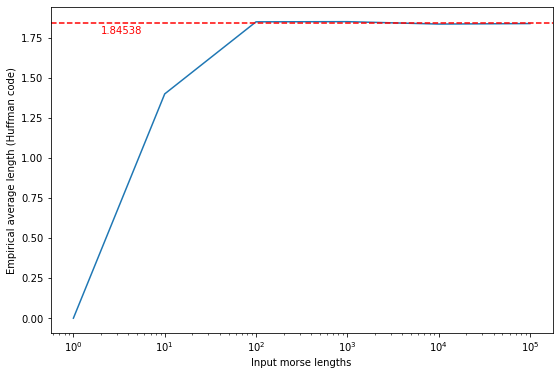

In [20]:
import matplotlib.pyplot as plt

input_lengths = [10**i for i in range(6)]
emp_lengths = np.zeros(len(input_lengths))

for i in range(len(input_lengths)):
    text = morse[:input_lengths[i]]
    dict_prob = {i : text.count(i) for i in set(text)}
    total = sum(dict_prob.values())
    for key in dict_prob.keys():
      dict_prob[key] /= total
    huff_code = Huffman_code(dict_prob)

    encoded_morse = ''
    for s in text:
        encoded_morse = encoded_morse + str(huff_code[s])
    emp_lengths[i] = len(encoded_morse)/len(text)
    
plt.figure(figsize=(9,6))
plt.plot(input_lengths,emp_lengths)
plt.axhline(y=huff_emp_avg_len, linestyle='dashed', color='r')
plt.text(2,huff_emp_avg_len-0.07,"{:.5f}" .format(huff_emp_avg_len), color='r')
plt.xlabel('Input morse lengths')
plt.ylabel('Empirical average length (Huffman code)')
plt.xscale('log')
    

### Question 8 

Encode the morse code using the on-line Lempel-Ziv algorithm. Give the total length
of the encoded code and the compression rate.

In [21]:
LZ_on_dict, U_LZ_on = LZ_online(morse)

# Occurence of each symbol in the encoded sequence
occ_dict = {i : U_LZ_on.count(i) for i in set(U_LZ_on)}

# Compute cardinalities of morse symbol and binary symbol and multiply it by log2(alphabet_size)
card_morse_symb = sum(occ_dict[key] for key in set(morse)) * np.log2(len(set(morse)))
card_binary_symb = sum(occ_dict[key] for key in set(U_LZ_on)-set(morse)) * np.log2(len(set(U_LZ_on)-set(morse)))
LZ_on_encoded_len = int(card_morse_symb + card_binary_symb)
print("Length of LZ on-line encoded morse: ", LZ_on_encoded_len)

LZ_on_compression_rate = len(morse)/LZ_on_encoded_len * np.log2(len(set(morse)))
print("Compression rate (LZ on-line): {:.4f}" .format(LZ_on_compression_rate))

Length of LZ on-line encoded morse:  1622705
Compression rate (LZ on-line): 1.4781


### Question 9 

Encode the text using the LZ77 algorithm with window_size=7. Give the total length
of the encoded text and the compression rate.

In [216]:
window_size = 7
U_LZ77 = LZ77(morse, window_size)

# Occurence of each symbol in the encoded sequence
occ_dict = {i : U_LZ77.count(i) for i in set(U_LZ77)}

# Compute cardinalities of morse symbol and addresses symbol 
# and multiply it by log2(morse_size) for morse symbols and by log2(window_size) for addresses bits
card_morse_symb = sum(occ_dict[key] for key in set(morse)) * np.log2(len(set(morse)))
card_address_symb = sum(occ_dict[key] for key in set(U_LZ77)-set(morse)) * np.log2(window_size+1)
LZ77_encoded_len = card_morse_symb + card_address_symb
print("Length of LZ77 encoded morse: ", LZ77_encoded_len)

LZ77_compression_rate = len(morse)/LZ77_encoded_len * np.log2(len(set(morse)))
print("Compression rate (LZ77): {:.4f}" .format(LZ77_compression_rate))

Length of LZ77 encoded morse:  3711926.0
Compression rate (LZ77): 0.6462


### Question 11

Encode the morse using one of the combinations of LZ77 and Huffman algorithms
you proposed in the previous question. Give the total length of the encoded morse
text and the compression rate.

In [24]:
def LZ77_Huffman(sequence, window_size):
    """
    Combination of LZ77 and Huffman algorithms to encode a given sequence.
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer
    
    Return:
    -------
    - LZ77_huff_encoded : the encoded sequence in the string format
    - LZ77_encoded_len : the length of the encoded sequence in bits
    - LZ77_huff_comp_rate : the compression rate between the length 
                    of the encoded sequence and the length of sequence 
    """
    U_LZ77 = LZ77(sequence, window_size)
    LZ77_occ_char = {i : U_LZ77.count(i) for i in set(U_LZ77)-set(list(map(str, range(window_size+1))))}
    total = sum(LZ77_occ_char.values())
    for key in LZ77_occ_char.keys():
        LZ77_occ_char[key] /= total
    LZ77_huff_code = Huffman_code(LZ77_occ_char)
    LZ77_huff_encoded = ''
    card_huff_symb = 0
    card_address_symb = 0
    for s in U_LZ77:
        if s in LZ77_huff_code:
            LZ77_huff_encoded += str(LZ77_huff_code[s])
            card_huff_symb += len(str(LZ77_huff_code[s]))
        else:
            LZ77_huff_encoded += s
            card_address_symb += 1
            
    card_huff_symb *= np.log2(2)
    card_address_symb *= np.log2(window_size+1)
    LZ77_encoded_len = card_huff_symb + card_address_symb

    LZ77_huff_comp_rate = len(sequence)/LZ77_encoded_len * np.log2(len(set(sequence)))
    return LZ77_huff_encoded, LZ77_encoded_len, LZ77_huff_comp_rate

In [25]:
LZ77_huff_encoded, LZ77_encoded_len, LZ77_huff_comp_rate = LZ77_Huffman(morse, 7)
print("Length of LZ77-Huffman encoded morse: ", LZ77_encoded_len)
print("Compression rate (LZ77-Huffman): {:.4f}" .format(LZ77_huff_comp_rate))

Length of LZ77-Huffman encoded morse:  3711926.0
Compression rate (LZ77-Huffman): 0.6462


### Question 12

Report the total lengths and compression rates using (a) LZ77 and (b) the
combination of LZ77 and Huffman, to encode the morse code for different values of
the sliding window size (use sliding window sizes from 1 to 11000 with a step of
1000). Compare your result with the total length and compression rate obtained using
the on-line Lempel-Ziv algorithm. Discuss your results.

In [27]:
from tqdm import tqdm
window_sizes = range(1, 11000, 1000)
LZ77_lengths = np.zeros(len(window_sizes))
LZ77_comp = np.zeros(len(window_sizes))
LZ77_Huff_lengths = np.zeros(len(window_sizes))
LZ77_Huff_comp = np.zeros(len(window_sizes))

for i in tqdm(range(len(window_sizes))):
    w_size = window_sizes[i]

    ########
    # LZ77 #
    ########
    U_LZ77 = LZ77(morse, w_size)
    # Compute LZ77 compression rate
    occ_dict = {i : U_LZ77.count(i) for i in set(U_LZ77)}
    card_morse_symb = sum(occ_dict[key] for key in set(morse)) * np.log2(len(set(morse)))
    card_address_symb = sum(occ_dict[key] for key in set(U_LZ77)-set(morse)) * np.log2(len(set(U_LZ77)-set(morse)))
    LZ77_encoded_len = card_morse_symb + card_address_symb
    LZ77_lengths[i] = LZ77_encoded_len
    LZ77_comp[i] = len(morse)/LZ77_encoded_len * np.log2(len(set(morse)))

    ################
    # LZ77-Huffman #
    ################
    _, LZ77_Huff_lengths[i], LZ77_Huff_comp[i] = LZ77_Huffman(morse, w_size)

100%|██████████| 11/11 [2:35:09<00:00, 846.30s/it] 


Text(0, 0.5, 'Total length')

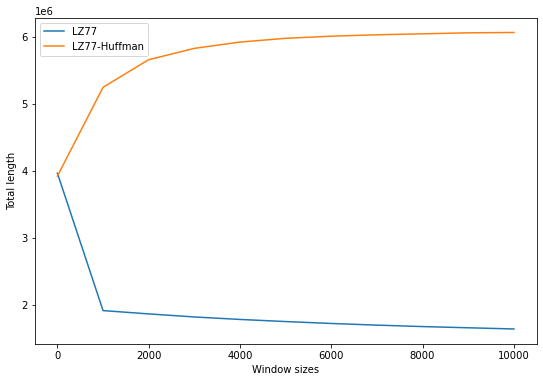

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(window_sizes, LZ77_lengths, label='LZ77')
plt.plot(window_sizes, LZ77_Huff_lengths, label='LZ77-Huffman')
plt.legend()
plt.xlabel('Window sizes')
plt.ylabel('Total length')

Text(0, 0.5, 'Compression rate')

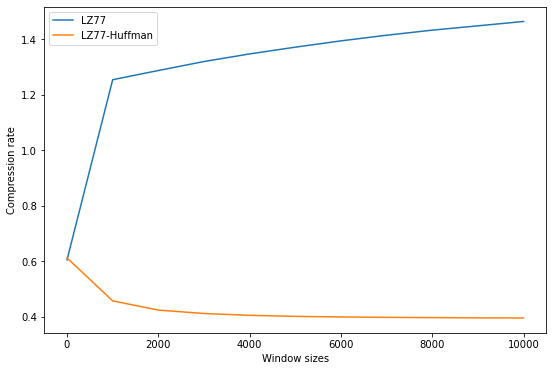

In [29]:
plt.figure(figsize=(9,6))
plt.plot(window_sizes, LZ77_comp, label='LZ77')
plt.plot(window_sizes, LZ77_Huff_comp, label='LZ77-Huffman')
plt.legend()
plt.xlabel('Window sizes')
plt.ylabel('Compression rate')

### Question 14

Instead of encoding the Morse code, encode directly the original text (27 symbols)
with the binary Huffman algorithm. Give the code for each symbol, the average
expected length, the experimental length of the encoded text and the compression
rate.



In [36]:
text = open('data/text.txt', 'r').read()
# Get the number of occurence of each symbol
dict_prob = {i : text.count(i) for i in set(text)}

# Marginal probability distribution of all symbols
total = sum(dict_prob.values())
for key in dict_prob.keys():
    dict_prob[key] /= total

# Binary Huffman code associated to original symbols
print("Binary Huffman code associated to original text symbols :")
huff_code = Huffman_code(dict_prob)
print("Symbol: "f"{'':<5}" + "Code: ")
for key in sorted(huff_code.keys()):
    print(f"{'':<2}"+"\'"+str(key)+"\'" + f"{'':<8}"+ f"{str(huff_code[key]):<10}")

Binary Huffman code associated to original text symbols :
Symbol:      Code: 
  ' '        111       
  'a'        1010      
  'b'        100000    
  'c'        100010    
  'd'        11010     
  'e'        001       
  'f'        100011    
  'g'        00000     
  'h'        0111      
  'i'        0100      
  'j'        1100111001
  'k'        1100110   
  'l'        11000     
  'm'        110010    
  'n'        0110      
  'o'        1001      
  'p'        100001    
  'q'        1100111011
  'r'        0101      
  's'        0001      
  't'        1011      
  'u'        00001     
  'v'        11001111  
  'w'        110110    
  'x'        1100111010
  'y'        110111    
  'z'        1100111000


In [37]:
# Encoded original text using binary Huffman code
encoded_text = ''
 
for s in text:
    encoded_text = encoded_text + str(huff_code[s])

# Expected average length
huff_avg_len = 0
for key in dict_prob:
    huff_avg_len += dict_prob[key] * len(huff_code[key])
print("Expected average length of Huffman code: {:.5f}" .format(huff_avg_len))

# Empirical average length
huff_emp_avg_len = len(encoded_text)/len(text)
print("Empirical average length of Huffman code: {:.5f}" .format(huff_emp_avg_len))

# Compression rate
compression_rate = len(text)/len(encoded_text) * np.log2(len(set(text)))/np.log2(len(set(encoded_text)))
print("Compression rate (original text and Huffman): {:.4f}" .format(compression_rate))

Expected average length of Huffman code: 4.15047
Empirical average length of Huffman code: 4.15047
Compression rate (original text and Huffman): 1.1456


## Channel coding

### Question 16
Implement a function to read the image and display the original image. Remember
that the image should be read in grayscale (one channel per pixel).

In [31]:
from PIL import Image

def open_display_img(img_path, display=True):
    """
    Open and display an image
    
    Arguments:
    ----------
    - img_path : Path to the image to open
    - display : True to display the image, False otherwise. (default=True)
    
    Return:
    -------
    - img : PIL image
    """
    img = Image.open(img_path).convert('L')
    if display:
        img.show()
    return img

### Question 17
Encode the image signal using a fixed-length binary code. What is the appropriate
number of bits? Justify.

In [44]:
import numpy as np

img = open_display_img(img_path="./data/image.png", display=True)
w, h = img.size
print("Width in pixels : ", w)
print("Height in pixels : ", h)
pixel_nb = w * h
print("Number of pixels : ", pixel_nb)
print("Number of bits to encode the image : ", pixel_nb*8)
img_pixels = list(img.getdata())
binary_code = {str(i):np.binary_repr(i, width=8) for i in range(256)}
print("Binary representation of a single pixel: ")
print(binary_code)



Width in pixels :  1984
Height in pixels :  1116
Number of pixels :  2214144
Number of bits to encode the image :  17713152
Binary representation of a single pixel: 
{'0': '00000000', '1': '00000001', '2': '00000010', '3': '00000011', '4': '00000100', '5': '00000101', '6': '00000110', '7': '00000111', '8': '00001000', '9': '00001001', '10': '00001010', '11': '00001011', '12': '00001100', '13': '00001101', '14': '00001110', '15': '00001111', '16': '00010000', '17': '00010001', '18': '00010010', '19': '00010011', '20': '00010100', '21': '00010101', '22': '00010110', '23': '00010111', '24': '00011000', '25': '00011001', '26': '00011010', '27': '00011011', '28': '00011100', '29': '00011101', '30': '00011110', '31': '00011111', '32': '00100000', '33': '00100001', '34': '00100010', '35': '00100011', '36': '00100100', '37': '00100101', '38': '00100110', '39': '00100111', '40': '00101000', '41': '00101001', '42': '00101010', '43': '00101011', '44': '00101100', '45': '00101101', '46': '00101110

### Question 18
Simulate the channel effect on the binary image signal. Then decode the image
signal and display the decoded image. What do you notice?

In [45]:
p = 0.01

def flip_bit(bit):
    """
    Flip a binary bit
    
    Arguments:
    ----------
    - bit : string. Either '0' or '1'
    
    Return:
    -------
    - '1' if bit is '0' else '0'
    """
    return '1' if bit == '0' else '0'

def pixel_through_channel(pixel, dict, p):
    """
    Make a pixel go through a channel with probability of error of p
    
    Arguments:
    ----------
    - pixel : grayscale value of the pixel (value between 0 and 255)
    - dict : dictionary to convert the pixel into its binary code
    - p : the probability of error of the channel
    
    Return:
    -------
    - the grayscale pixel value of the input pixel after the channel
    """
    binary_pixel = dict[str(pixel)]
    result_after_channel = ""
    for bit in binary_pixel:
        result_after_channel += flip_bit(bit) if np.random.random(1)[0] < p else bit
    for key in dict:
        if dict[key] == result_after_channel:
            return int(key)
    return result_after_channel

image_received = []
for pixel in img_pixels:
    image_received.append(pixel_through_channel(pixel = str(pixel), dict=binary_code, p=p))
image_received = np.asarray(image_received)
image_received = np.reshape(image_received, (h, w))
image_received = Image.fromarray(image_received)
image_received.show()
if image_received.mode != 'L':
    image_received = image_received.convert('L')
image_received.save("image_Q18.png")
    

### Question 19
Instead of sending directly through the channel the binary image signal, you will first
introduce some redundancy. To do that, implement a function that returns the
Hamming (7,4) code for a given sequence of binary symbols. Then, using your
function, encode the binary image signal (from question 16).

In [46]:
def hamming_7_4(pixel, dict):
    """
    Compute the Hamming (7,4) code of a pixel
    
    Arguments:
    ----------
    - pixel : grayscale value of the pixel (value between 0 and 255)
    - dict : dictionary to convert the pixel into its binary code
    
    Return:
    -------
    - the Hamming (7,4) code of the input pixel
    """
    
    pixel_binary = dict[str(pixel)]
    new_seq = pixel_binary[:4]
    new_seq += str((int(pixel_binary[0]) + int(pixel_binary[1]) + int(pixel_binary[2]))%2)
    new_seq += str((int(pixel_binary[1]) + int(pixel_binary[2]) + int(pixel_binary[3]))%2)
    new_seq += str((int(pixel_binary[0]) + int(pixel_binary[2]) + int(pixel_binary[3]))%2)

    new_seq += pixel_binary[4:]
    new_seq += str((int(pixel_binary[4]) + int(pixel_binary[5]) + int(pixel_binary[6]))%2)
    new_seq += str((int(pixel_binary[5]) + int(pixel_binary[6]) + int(pixel_binary[7]))%2)
    new_seq += str((int(pixel_binary[4]) + int(pixel_binary[6]) + int(pixel_binary[7]))%2)

    return new_seq

new_sequence = []
for pixel in img_pixels:
    new_sequence.append(hamming_7_4(pixel=str(pixel), dict=binary_code))



### Question 20
Simulate the channel effect on the binary image signal with redundancy. Then
decode the binary image signal. Display the decoded image signal. What do you
notice? Explain your decoding procedure.

In [52]:
def through_channel_7_4(pixel, dict, p):
    """
    Make a pixel go through a channel (with Hamming (7,4) code correction) with probability of error of p
    
    Arguments:
    ----------
    - pixel : grayscale value of the pixel (value between 0 and 255)
    - dict : dictionary to convert the pixel into its binary code
    - p : the probability of error of the channel
    
    Return:
    -------
    - the grayscale pixel value of the input pixel after the channel
    """
    pixel_hamming = hamming_7_4(pixel, dict)
    result_after_channel = ""
    for bit in pixel_hamming:
        result_after_channel += flip_bit(bit) if np.random.random(1)[0] < p else bit
    final_signal = ""
    shift = 0
    for i in range(2):
        signal_bits = result_after_channel[0+shift] + result_after_channel[1+shift] + result_after_channel[2+shift] + result_after_channel[3+shift]
        parity_bits = result_after_channel[4+shift] + result_after_channel[5+shift] + result_after_channel[6+shift]
        
        actual_parity_bits = ""
        actual_parity_bits += str((int(signal_bits[0]) + int(signal_bits[1]) + int(signal_bits[2]))%2)
        actual_parity_bits += str((int(signal_bits[1]) + int(signal_bits[2]) + int(signal_bits[3]))%2)
        actual_parity_bits += str((int(signal_bits[0]) + int(signal_bits[2]) + int(signal_bits[3]))%2)

        syndrome = str((int(parity_bits[0]) + int(actual_parity_bits[0]))%2) + str((int(parity_bits[1]) + int(actual_parity_bits[1]))%2) + str((int(parity_bits[2]) + int(actual_parity_bits[2]))%2)
        if syndrome == "111":
            signal_bits = signal_bits[:2] + flip_bit(signal_bits[2]) + signal_bits[3]
        elif syndrome == "110":
            signal_bits = signal_bits[0] + flip_bit(signal_bits[1]) + signal_bits[2:]
        elif syndrome == "101":
            signal_bits = flip_bit(signal_bits[0]) + signal_bits[1:]
        elif syndrome == "011":
            signal_bits = signal_bits[:3] + flip_bit(signal_bits[3])
        final_signal += signal_bits
        shift += 7
        
    for key in dict:
        if dict[key] == final_signal:
            return int(key)
    return final_signal

image_received = []
for pixel in img_pixels:
    image_received.append(through_channel_7_4(pixel = str(pixel), dict=binary_code, p=p))
image_received = np.asarray(image_received)
image_received = np.reshape(image_received, (h, w))
image_received = Image.fromarray(image_received)
image_received.show()
if image_received.mode != 'L':
    image_received = image_received.convert('L')
image_received.save("image_Q20.png")



In [51]:
print(through_channel_7_4(pixel=str(153), dict=binary_code, p=p))

153
